In [228]:
# Import libraries And Utilities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
plt.style.use('ggplot')


In [81]:
# Reading Data
df = pd.read_csv('/Users/junghopark/Desktop/Stevens Coursework/Fall 2020/BIA-652 Multivariate Data Analysis/Final Project/BankChurners.csv')
# delete 2 irrelevant columns
df = df[df.columns[:-2]]
df.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [82]:
# Preprocess Attrition_Flag column
df['Attrition_Flag'].replace({'Existing Customer':0, 'Attrited Customer':1},inplace=True)
# Drop Clinetnum column: Irrelevant.
df.drop(df.columns[[0]].values,axis=1,inplace=True)

df.head(4)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760


In [70]:
# Finding Unique Category Values

c_att = df['Attrition_Flag'].unique()
c_gen = df['Gender'].unique()
c_edu = df['Education_Level'].unique()
c_Mar = df['Marital_Status'].unique()
c_Inc = df['Income_Category'].unique()
c_card = df['Card_Category'].unique()

#category_columns = ['Attrition_Flag', 'Gender','Education_Level','Marital_Status','Income_Category','Card_Category']

# Store unique categories in a dictionary
c_names = {'Attrition_Flag': c_att,
                 'Gender': c_gen,
          'Education_Level': c_edu,
          'Marital_Status': c_Mar,
          'Income_Category': c_Inc,
          'Card_Category': c_card}
print(c_names)


{'Attrition_Flag': array(['Existing Customer', 'Attrited Customer'], dtype=object), 'Gender': array(['M', 'F'], dtype=object), 'Education_Level': array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object), 'Marital_Status': array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object), 'Income_Category': array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object), 'Card_Category': array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)}


In [63]:
# Look up data types of each column.
a = pd.DataFrame(df.dtypes)
a

,0
CLIENTNUM,int64
Attrition_Flag,object
Customer_Age,int64
Gender,object
Dependent_count,int64
Education_Level,object
Marital_Status,object
Income_Category,object
Card_Category,object
Months_on_book,int64


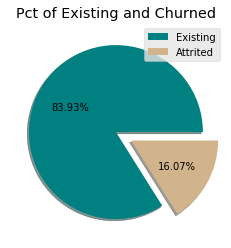

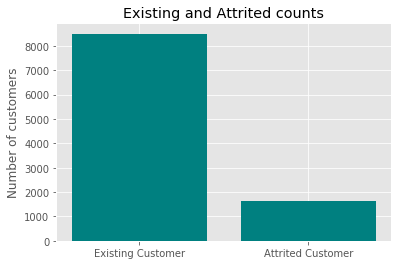

In [234]:
# EDA - Attrition_Flag

sizes = (df['Attrition_Flag'].value_counts()).tolist()
plt.pie(sizes,shadow=True,autopct='%.2f%%', colors=['teal', 'tan'], explode = [0,0.2])
plt.title('Pct of Existing and Churned')
plt.legend(['Existing','Attrited'], loc = 'upper right')
plt.show()

plt.bar(c_att, sizes, color='teal')
plt.title('Existing and Attrited counts')
plt.ylabel('Number of customers')
plt.show()

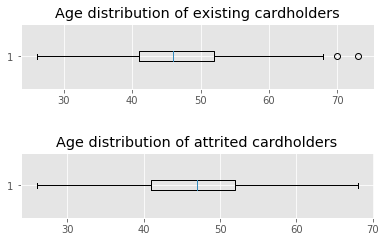

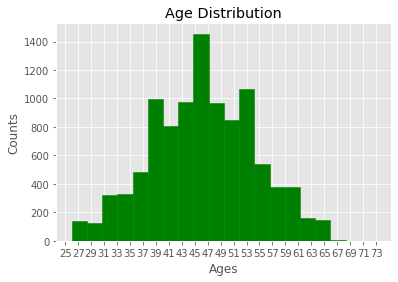

In [233]:
#EDA - Distribution of customer ages by existing vs. attrited

age_existing = df['Customer_Age'].loc[df['Attrition_Flag'] == 0]
age_attrited = df['Customer_Age'].loc[df['Attrition_Flag'] == 1]

fig, (ax1, ax2) = plt.subplots(2,1)
ax1.boxplot(x=age_existing,vert=False)
ax1.title.set_text('Age distribution of existing cardholders')
ax2.boxplot(x=age_attrited,vert=False)
ax2.title.set_text('Age distribution of attrited cardholders')
fig.tight_layout(pad=3.0)
plt.show()

# Median value is smaller in existing cardholders and IQR range is smaller.

# EDA - AGE distribution

plt.hist(df['Customer_Age'],bins=20, Color='green')
plt.title('Age Distribution')
plt.xlabel('Ages')
plt.ylabel('Counts')
plt.xticks(range(25,75,2))
plt.show()

# The distribution is Normal

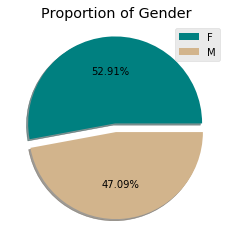

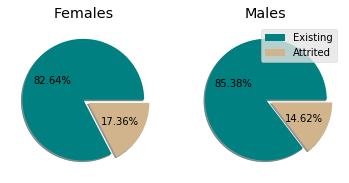

In [232]:
# Gender Distribution

sizes_gender = df['Gender'].value_counts()    #not much difference. thus it's eually distributed.
plt.pie(sizes_gender.tolist(),autopct='%1.2f%%',explode=[0.1,0],shadow=True, colors=['teal', 'tan'])
plt.legend(sizes_gender.index.values)
plt.title('Proportion of Gender')
plt.show()


female_size = df.loc[df['Gender']=='F']['Attrition_Flag'].value_counts()
male_size = df.loc[df['Gender']=='M']['Attrition_Flag'].value_counts()
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.pie(female_size,explode=[0,0.1],shadow=True,autopct='%1.2f%%',colors=['teal', 'tan'])
ax1.title.set_text('Females')
ax2.pie(male_size,explode=[0,0.1],shadow=True,autopct='%1.2f%%',colors=['teal', 'tan'])
ax2.title.set_text('Males')
plt.legend(['Existing', 'Attrited'])
plt.show()

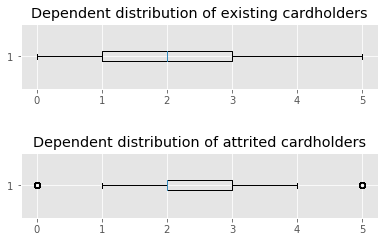

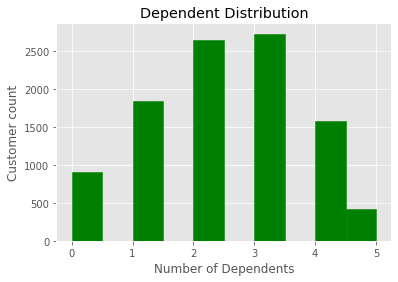

In [230]:
# Distribution of Dependent counts

dep_existing = df['Dependent_count'].loc[df['Attrition_Flag'] == 0]
dep_attrited = df['Dependent_count'].loc[df['Attrition_Flag'] == 1]

fig, (ax1, ax2) = plt.subplots(2,1)
ax1.boxplot(x=dep_existing,vert=False)
ax1.title.set_text('Dependent distribution of existing cardholders')
ax2.boxplot(x=dep_attrited,vert=False)
ax2.title.set_text('Dependent distribution of attrited cardholders')
fig.tight_layout(pad=3.0)
plt.show()

# EDA - AGE distribution

plt.hist(df['Dependent_count'], Color='green', width=0.5)
plt.title('Dependent Distribution')
plt.xlabel('Number of Dependents')
plt.ylabel('Customer count')
plt.xticks(range(0,6,1))
plt.show()

#Number of dependents are normally distributed


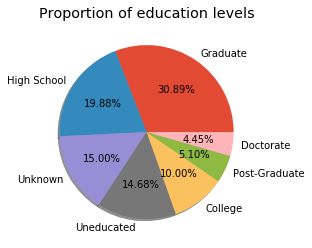

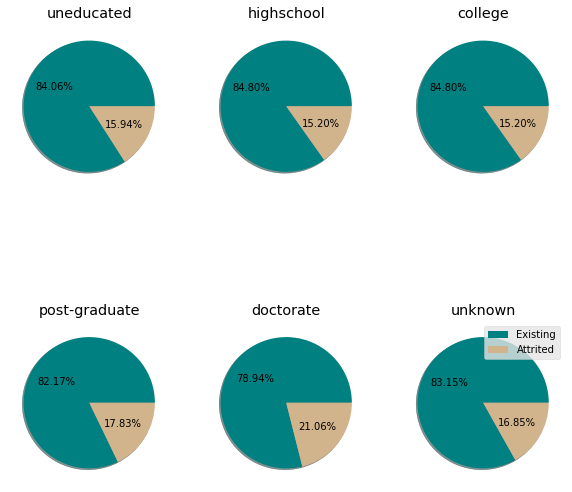

In [254]:
# EDA - Education level

# Education level Distribution

sizes_edu = df['Education_Level'].value_counts()
plt.pie(sizes_edu.tolist(),autopct='%1.2f%%',shadow=True, labels=sizes_edu.index.values)
plt.title('Proportion of education levels')
plt.show()

# Education level distribution / attrited vs existing
uneducated_size = df.loc[df['Education_Level']=='Uneducated']['Attrition_Flag'].value_counts()
highschool_size = df.loc[df['Education_Level']=='High School']['Attrition_Flag'].value_counts()
college_size = df.loc[df['Education_Level']=='College']['Attrition_Flag'].value_counts()
postgrad_size = df.loc[df['Education_Level']=='Post-Graduate']['Attrition_Flag'].value_counts()
doctorate_size = df.loc[df['Education_Level']=='Doctorate']['Attrition_Flag'].value_counts()
unknown_size = df.loc[df['Education_Level']=='Unknown']['Attrition_Flag'].value_counts()


fig,((ax1,ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(10,10))
ax1.pie(uneducated_size,shadow=True,autopct='%.2f%%',colors=['teal', 'tan'])
ax1.title.set_text('uneducated')
ax2.pie(highschool_size, shadow=True,autopct='%.2f%%',colors=['teal', 'tan'])
ax2.title.set_text('highschool')
ax3.pie(college_size,shadow=True,autopct='%.2f%%',colors=['teal', 'tan'])
ax3.title.set_text('college')
ax4.pie(postgrad_size,shadow=True,autopct='%.2f%%',colors=['teal', 'tan'])
ax4.title.set_text('post-graduate')
ax5.pie(doctorate_size,shadow=True,autopct='%.2f%%',colors=['teal', 'tan'])
ax5.title.set_text('doctorate')
ax6.pie(unknown_size,shadow=True,autopct='%.2f%%',colors=['teal', 'tan'])
ax6.title.set_text('unknown')
plt.legend(['Existing', 'Attrited'])
plt.show()


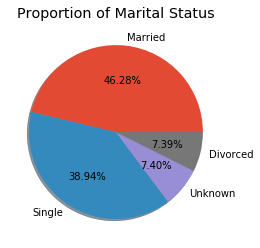

In [235]:
# EDA - Marital Status

# Education level Distribution

sizes_mar = df['Marital_Status'].value_counts()
plt.pie(sizes_mar.tolist(),autopct='%1.2f%%',shadow=True, labels=sizes_mar.index.values)
plt.title('Proportion of Marital Status')
plt.show()

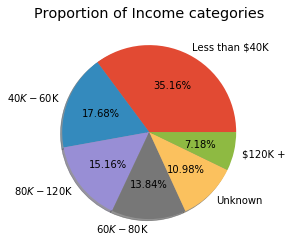

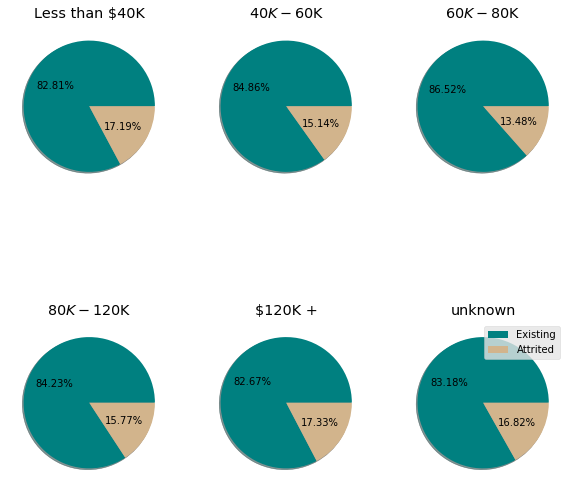

In [253]:
# EDA - Income level

# Income level Distribution

sizes_income = df['Income_Category'].value_counts()
plt.pie(sizes_income.tolist(),autopct='%1.2f%%',shadow=True, labels=sizes_income.index.values)
plt.title('Proportion of Income categories')
plt.show()

# Education level distribution / attrited vs existing
under40_size = df.loc[df['Income_Category']=='Less than $40K']['Attrition_Flag'].value_counts()
bet4060_size = df.loc[df['Income_Category']=='$40K - $60K']['Attrition_Flag'].value_counts()
bet6080_size = df.loc[df['Income_Category']=='$60K - $80K']['Attrition_Flag'].value_counts()
bet80120_size = df.loc[df['Income_Category']=='$80K - $120K']['Attrition_Flag'].value_counts()
over120_size = df.loc[df['Income_Category']=='$120K +']['Attrition_Flag'].value_counts()
unknown_income_size = df.loc[df['Income_Category']=='Unknown']['Attrition_Flag'].value_counts()



fig,((ax1,ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(10,10))
ax1.pie(under40_size,shadow=True,autopct='%.2f%%',colors=['teal', 'tan'])
ax1.title.set_text('Less than $40K')
ax2.pie(bet4060_size, shadow=True,autopct='%.2f%%',colors=['teal', 'tan'])
ax2.title.set_text('$40K - $60K')
ax3.pie(bet6080_size,shadow=True,autopct='%.2f%%',colors=['teal', 'tan'])
ax3.title.set_text('$60K - $80K')
ax4.pie(bet80120_size,shadow=True,autopct='%.2f%%',colors=['teal', 'tan'])
ax4.title.set_text('$80K - $120K')
ax5.pie(over120_size,shadow=True,autopct='%.2f%%',colors=['teal', 'tan'])
ax5.title.set_text('$120K +')
ax6.pie(unknown_income_size,shadow=True,autopct='%.2f%%',colors=['teal', 'tan'])
ax6.title.set_text('unknown')
plt.legend(['Existing', 'Attrited'])
plt.show()



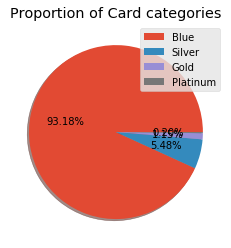

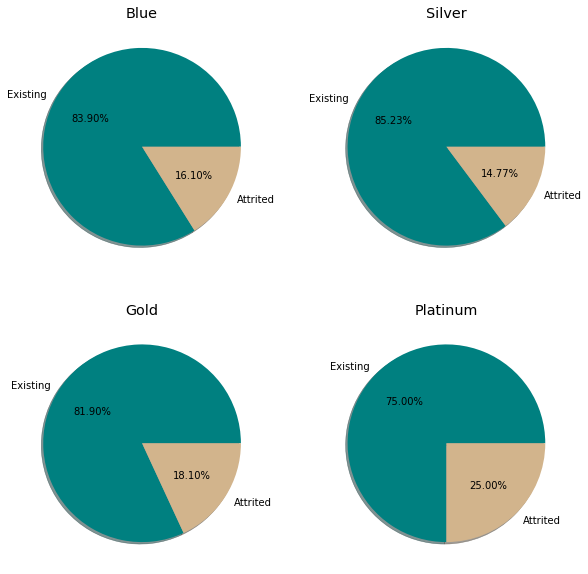

In [252]:
# EDA - Card Category

# Card Category Distribution

sizes_card = df['Card_Category'].value_counts()
plt.pie(sizes_card.tolist(),autopct='%1.2f%%',shadow=True)
plt.legend(sizes_card.index.values)
plt.title('Proportion of Card categories')
plt.show()

# Card category distribution / attrited vs existing
blue_size = df.loc[df['Card_Category']=='Blue']['Attrition_Flag'].value_counts()
silver_size = df.loc[df['Card_Category']=='Silver']['Attrition_Flag'].value_counts()
gold_size = df.loc[df['Card_Category']=='Gold']['Attrition_Flag'].value_counts()
platinum_size = df.loc[df['Card_Category']=='Platinum']['Attrition_Flag'].value_counts()


fig,((ax1,ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,10))
ax1.pie(blue_size,shadow=True,autopct='%.2f%%',colors=['teal', 'tan'], labels=['Existing', 'Attrited'])
ax1.title.set_text('Blue')
ax2.pie(silver_size, shadow=True,autopct='%.2f%%',colors=['teal', 'tan'], labels=['Existing', 'Attrited'])
ax2.title.set_text('Silver')
ax3.pie(gold_size,shadow=True,autopct='%.2f%%',colors=['teal', 'tan'], labels=['Existing', 'Attrited'])
ax3.title.set_text('Gold')
ax4.pie(platinum_size,shadow=True,autopct='%.2f%%',colors=['teal', 'tan'], labels=['Existing', 'Attrited'])
ax4.title.set_text('Platinum')

#Platinum's attrition rate is most highest, Silver at lowest.

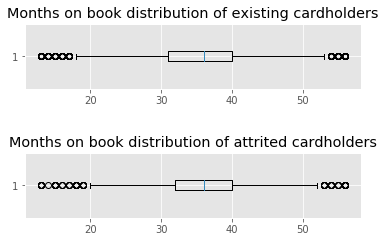

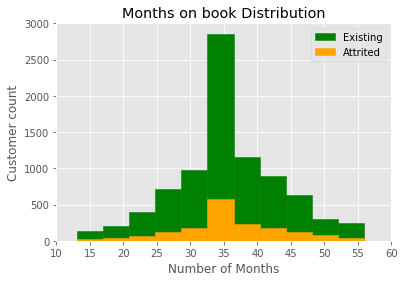

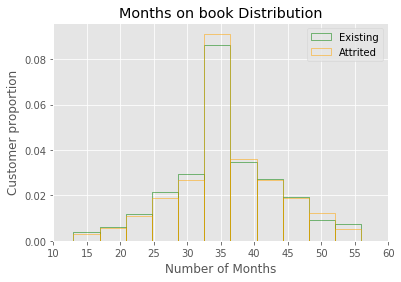

In [282]:
# Distribution of Month on book counts

mon_existing = df['Months_on_book'].loc[df['Attrition_Flag'] == 0]
mon_attrited = df['Months_on_book'].loc[df['Attrition_Flag'] == 1]

fig, (ax1, ax2) = plt.subplots(2,1)
ax1.boxplot(x=mon_existing,vert=False)
ax1.title.set_text('Months on book distribution of existing cardholders')
ax2.boxplot(x=mon_attrited,vert=False)
ax2.title.set_text('Months on book distribution of attrited cardholders')
fig.tight_layout(pad=3.0)
plt.show()

# EDA - Month on book distribution

plt.hist(mon_existing, Color='green', bins = 11,stacked=True)
plt.hist(mon_attrited, Color='orange', bins = 11,stacked=True)
plt.title('Months on book Distribution')
plt.xlabel('Number of Months')
plt.ylabel('Customer count')
plt.xticks(range(10,65,5))
plt.legend(['Existing', 'Attrited'])
plt.show()

#Number of Months on book is normally distributed
# EDA - Month on book distribution

plt.hist(mon_existing, Color='green', bins = 11,stacked=True, density=True, fill=False)
plt.hist(mon_attrited, Color='orange', bins = 11,stacked=True, density=True, fill=False)
plt.title('Months on book Distribution')
plt.xlabel('Number of Months')
plt.ylabel('Customer proportion')
plt.xticks(range(10,65,5))
plt.legend(['Existing', 'Attrited'])
plt.show()

#Even thought the customer count quantity differs between attrited and existing, the propotions are almost identical

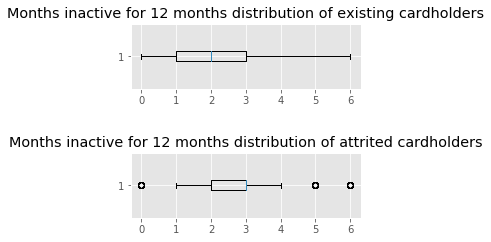

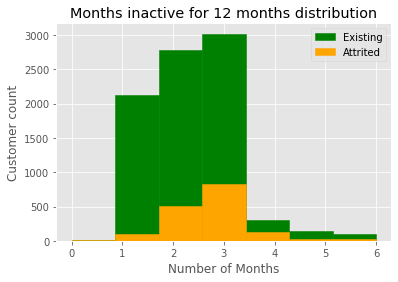

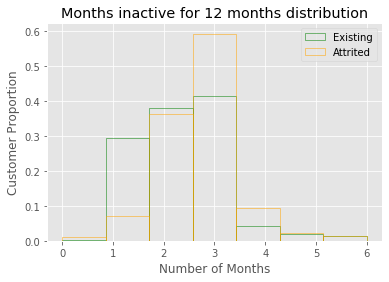

In [281]:
# Distribution of Months inactive for 12 months counts

inactive_existing = df['Months_Inactive_12_mon'].loc[df['Attrition_Flag'] == 0]
inactive_attrited = df['Months_Inactive_12_mon'].loc[df['Attrition_Flag'] == 1]

fig, (ax1, ax2) = plt.subplots(2,1)
ax1.boxplot(x=inactive_existing,vert=False)
ax1.title.set_text('Months inactive for 12 months distribution of existing cardholders')
ax2.boxplot(x=inactive_attrited,vert=False)
ax2.title.set_text('Months inactive for 12 months distribution of attrited cardholders')
fig.tight_layout(pad=3.0)
plt.show()

# EDA - Months inactive for 12 monthsdistribution

plt.hist(inactive_existing, Color='green', bins = 7,stacked=True)
plt.hist(inactive_attrited, Color='orange', bins = 7,stacked=True)
plt.title('Months inactive for 12 months distribution')
plt.xlabel('Number of Months')
plt.ylabel('Customer count')
plt.xticks(range(0,7,1))
plt.legend(['Existing', 'Attrited'])
plt.show()


# EDA - Months inactive for 12 months proportion distribution

plt.hist(inactive_existing, Color='green', bins = 7,stacked=True, density=True, fill=False)
plt.hist(inactive_attrited, Color='orange', bins = 7,stacked=True, density=True, fill=False)
plt.title('Months inactive for 12 months distribution')
plt.xlabel('Number of Months')
plt.ylabel('Customer Proportion')
plt.xticks(range(0,7,1))
plt.legend(['Existing', 'Attrited'])
plt.show()


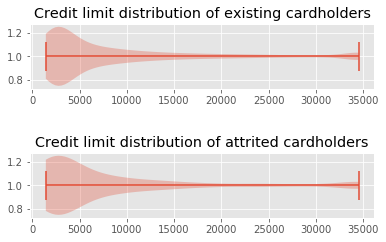

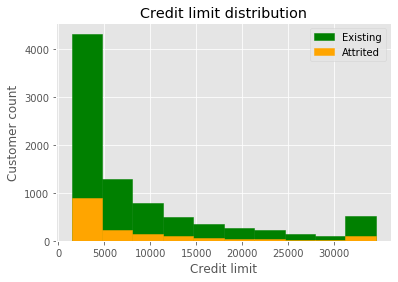

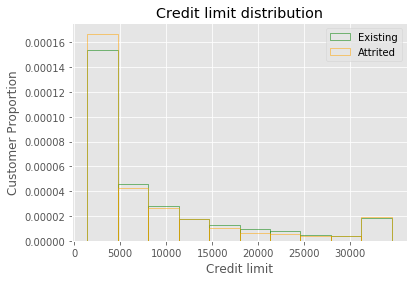

In [291]:
# Distribution of Credit limit counts

climit_existing = df['Credit_Limit'].loc[df['Attrition_Flag'] == 0]
climit_attrited = df['Credit_Limit'].loc[df['Attrition_Flag'] == 1]

fig, (ax1, ax2) = plt.subplots(2,1)
ax1.violinplot(climit_existing,vert=False)
ax1.title.set_text('Credit limit distribution of existing cardholders')
ax2.violinplot(climit_attrited,vert=False)
ax2.title.set_text('Credit limit distribution of attrited cardholders')
fig.tight_layout(pad=3.0)
plt.show()

# EDA - Credit limit distribution

plt.hist(climit_existing, Color='green',stacked=True)
plt.hist(climit_attrited, Color='orange',stacked=True)
plt.title('Credit limit distribution')
plt.xlabel('Credit limit')
plt.ylabel('Customer count')
plt.xticks(range(0,35000,5000))
plt.legend(['Existing', 'Attrited'])
plt.show()


# EDA - Credit limit proportion distribution

plt.hist(climit_existing, Color='green',stacked=True, density=True, fill=False)
plt.hist(climit_attrited, Color='orange',stacked=True, density=True, fill=False)
plt.title('Credit limit distribution')
plt.xlabel('Credit limit')
plt.ylabel('Customer Proportion')
plt.xticks(range(0,35000,5000))
plt.legend(['Existing', 'Attrited'])
plt.show()


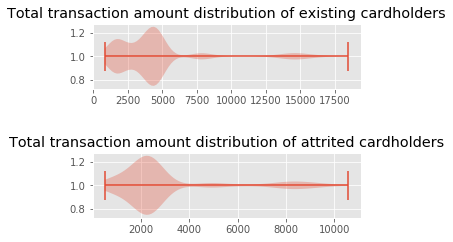

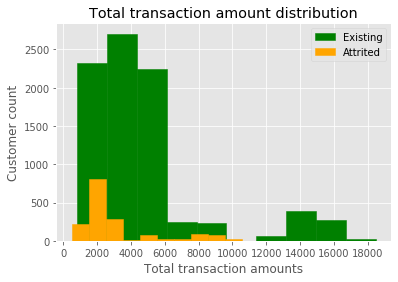

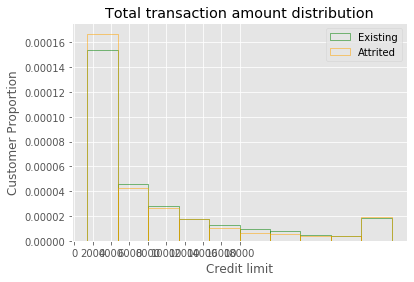

In [293]:
# Distribution of Total transaction amount counts

transamt_existing = df['Total_Trans_Amt'].loc[df['Attrition_Flag'] == 0]
transamt_attrited = df['Total_Trans_Amt'].loc[df['Attrition_Flag'] == 1]

fig, (ax1, ax2) = plt.subplots(2,1)
ax1.violinplot(transamt_existing,vert=False)
ax1.title.set_text('Total transaction amount distribution of existing cardholders')
ax2.violinplot(transamt_attrited,vert=False)
ax2.title.set_text('Total transaction amount distribution of attrited cardholders')
fig.tight_layout(pad=3.0)
plt.show()

# EDA - Total transaction amount distribution

plt.hist(transamt_existing, Color='green',stacked=True)
plt.hist(transamt_attrited, Color='orange',stacked=True)
plt.title('Total transaction amount distribution')
plt.xlabel('Total transaction amounts')
plt.ylabel('Customer count')
plt.xticks(range(0,20000,2000))
plt.legend(['Existing', 'Attrited'])
plt.show()


# EDA - Total transaction amount proportion distribution

plt.hist(climit_existing, Color='green',stacked=True, density=True, fill=False)
plt.hist(climit_attrited, Color='orange',stacked=True, density=True, fill=False)
plt.title('Total transaction amount distribution')
plt.xlabel('Credit limit')
plt.ylabel('Customer Proportion')
plt.xticks(range(0,20000,2000))
plt.legend(['Existing', 'Attrited'])
plt.show()

#interesting..!

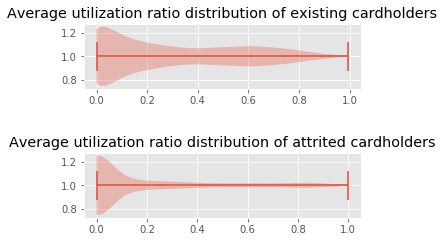

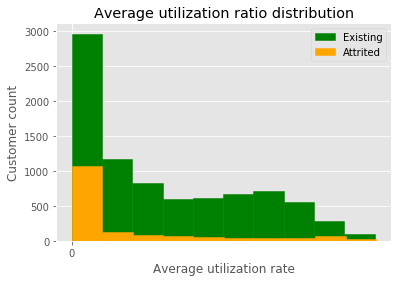

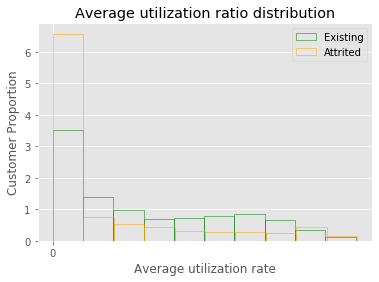

In [297]:
# Distribution of Avg_Utilization_Ratio counts

utilrate_existing = df['Avg_Utilization_Ratio'].loc[df['Attrition_Flag'] == 0]
utilrate_attrited = df['Avg_Utilization_Ratio'].loc[df['Attrition_Flag'] == 1]

fig, (ax1, ax2) = plt.subplots(2,1)
ax1.violinplot(utilrate_existing,vert=False)
ax1.title.set_text('Average utilization ratio distribution of existing cardholders')
ax2.violinplot(utilrate_attrited,vert=False)
ax2.title.set_text('Average utilization ratio distribution of attrited cardholders')
fig.tight_layout(pad=3.0)
plt.show()

# EDA - Total transaction amount distribution

plt.hist(utilrate_existing, Color='green',stacked=True)
plt.hist(utilrate_attrited, Color='orange',stacked=True)
plt.title('Average utilization ratio distribution')
plt.xlabel('Average utilization rate')
plt.ylabel('Customer count')
plt.xticks(range(0,1))
plt.legend(['Existing', 'Attrited'])
plt.show()


# EDA - Total transaction amount proportion distribution

plt.hist(utilrate_existing, Color='green',stacked=True, density=True, fill=False)
plt.hist(utilrate_attrited, Color='orange',stacked=True, density=True, fill=False)
plt.title('Average utilization ratio distribution')
plt.xlabel('Average utilization rate')
plt.ylabel('Customer Proportion')
plt.xticks(range(0,1))
plt.legend(['Existing', 'Attrited'])
plt.show()

# Customers who has higher utilization ratio (Proportion of Total revolving balance is higher) has higher proportion as an existing customer.